## Ejercicio 1 - Teleportación Cuántica

Implementación de teleportación cuántica. El comentario de los resultados se encuentra en el apartado 1 de comentarios.pdf.

<IPython.core.display.Latex object>

/tmp/ipykernel_2850/1696737550.py:62: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  circ.x(2).c_if(cz, 1)
/tmp/ipykernel_2850/1696737550.py:63: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  circ.z(2).c_if(cx, 1)


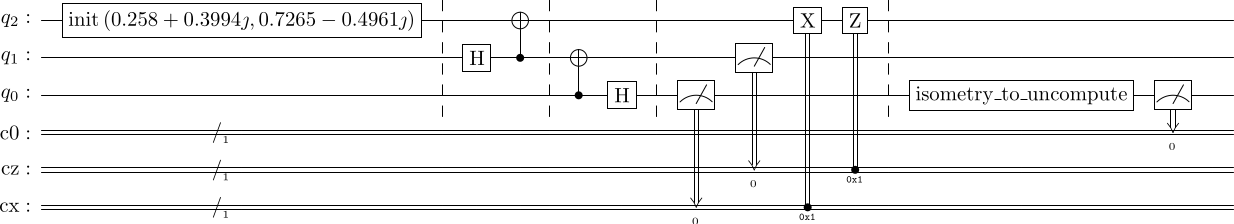

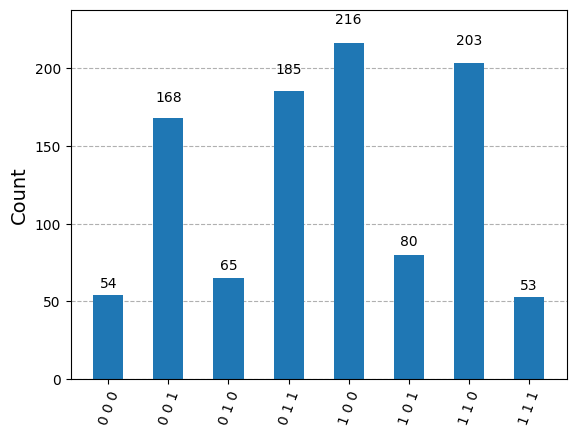

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize

def bell_phi_plus(circ, q1, q2):
    """
    Create a Bell state (|Φ+⟩) between two qubits.

    This function applies a Hadamard gate to the first qubit (q1) and then a CNOT gate
    with the first qubit as control and the second qubit (q2) as target. This creates
    an entangled Bell state (|Φ+⟩) between the two qubits.

    Parameters:
    circ (QuantumCircuit): The quantum circuit to which the gates will be added.
    q1 (int): The index of the first qubit.
    q2 (int): The index of the second qubit.

    Returns:
    None
    """
    circ.h(q1)
    circ.cx(q1, q2)
    circ.barrier()

# Creamos el registro quantico con 3 qubits
qreg = QuantumRegister(3, name='q')

# Creamos el registro clasico con 3 bits
cz = ClassicalRegister(1, name='cx')
cx = ClassicalRegister(1, name='cz')
c0 = ClassicalRegister(1, name='c0')

# Creamos el circuito cuantico
circ = QuantumCircuit(qreg, cz, cx, c0, name='quantum teleportation')

# Inicializamos el qubit de Alice a un estado arbitrario psi y mostramos su valor.
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
init_gate = Initialize(psi)
init_gate.label = "init"
init_gate_inverse = init_gate.gates_to_uncompute()
init_gate_inverse.label = "init†"

circ.append(init_gate, [2])
circ.barrier()

# Creamos un par EPR entre R y S
bell_phi_plus(circ, 1, 2)

# Aplicamos una medicion de Bell entre S y el qubit a teleportar
circ.cx(0, 1)
circ.h(0)
circ.barrier()

# Medimos los qubits 0 y 1 
circ.measure(0, 0)
circ.measure(1, 1)

# Aplicamos la correccion que tiene que hacer Bob
circ.x(2).c_if(cz, 1)
circ.z(2).c_if(cx, 1)
circ.barrier()

# Hacemos la inversa de la inicializacion
circ.append(init_gate_inverse, [0])
measure = circ.measure(0, 2)
# Mostrar el circuito
display(circ.draw(output='latex', reverse_bits=True))

# Simulamos el circuito
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(circ, simulator))
result = job.result()

# Mostramos el histograma
plot_histogram(result.get_counts(circ))

## Ejercicio 2 - Codificación Superdensa

Implementación de codificación superdensa. El comentario de los resultados se encuentra en el apartado 2 de comentarios.pdf. En este primero bloque de codigo queremos mandar a Bob los bits $10\Rightarrow$ tenemos que aplicar la puerta de Pauli-Z por la tabla que se nos da en el enunciado.

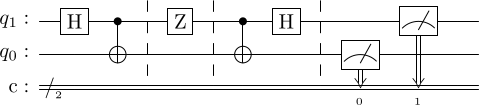

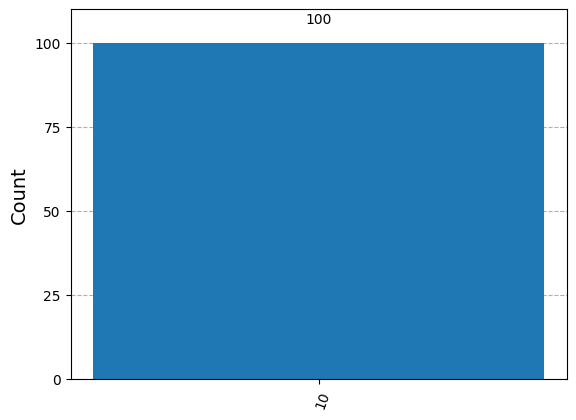

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def bell_phi_plus(circ, q1, q2):
    circ.h(q1)
    circ.cx(q1, q2)
    circ.barrier()

# Creamos el registro quantico con 3 qubits
qreg = QuantumRegister(2, name='q')

# Creamos el registro clasico con 3 bits
creg = ClassicalRegister(2, name='c')

# Creamos el circuito cuantico
circ = QuantumCircuit(qreg, creg, name='superdense coding')

# Creamos un par EPR entre R y S
circ.h(1)
circ.cx(1, 0)
circ.barrier()

## Aplicamos la codificacion que queremos enviar 10 en este caso
a = 1
b = 0

if a == 1:
    circ.z(1)
if b == 1:
    circ.x(1)
circ.barrier()

# Aplicamos una medicion de Bell entre S y el qubit a teleportar
circ.cx(1, 0)
circ.h(1)
circ.barrier()

# Medimos
circ.measure(0, 0)
circ.measure(1, 1)

# Mostrar el circuito
display(circ.draw(output='latex', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
backend = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circ, backend=backend, optimization_level=1)
job = backend.run(transpiled_circuit, shots=100)
result = job.result()
counts = result.get_counts()

#Mostramos los resultados
plot_histogram(counts)

## Ejercicio 3 - Lanzamiento a backends reales

Para lanzar los circuitos a backends reales lo primero es añadir el token de acceso que se puede encontrar en IBM Quantum Platfrom.

Despues de el primer bloque de codigo en el que se importa el token se tienen 2 bloques de código, uno para cada circuito hecho en los ejercicios anteriores.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Auth token for IBM Quantum
token = ""

<IPython.core.display.Latex object>

/tmp/ipykernel_2850/316028694.py:62: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  circ.x(2).c_if(cz, 1)
/tmp/ipykernel_2850/316028694.py:63: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  circ.z(2).c_if(cx, 1)


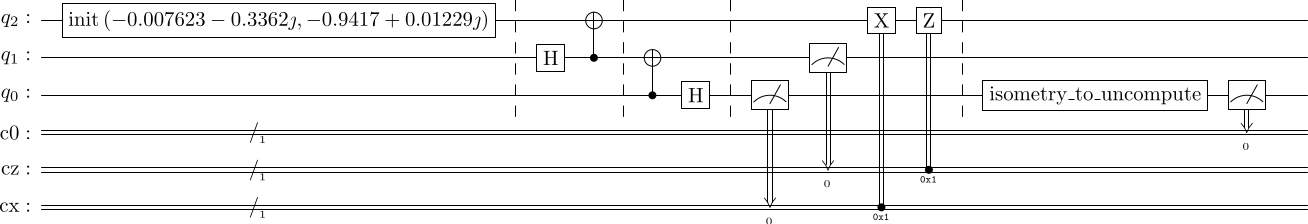

Backends disponibles: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]
job id: czbhp8sqadq0008cf3pg
PrimitiveResult([SamplerPubResult(data=DataBin(cx=BitArray(<shape=(), num_shots=100, num_bits=1>), cz=BitArray(<shape=(), num_shots=100, num_bits=1>), c0=BitArray(<shape=(), num_shots=100, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-03-16 18:40:47', stop='2025-03-16 18:40:54', size=100>)])}, 'version': 2})
{'1': 59, '0': 41}


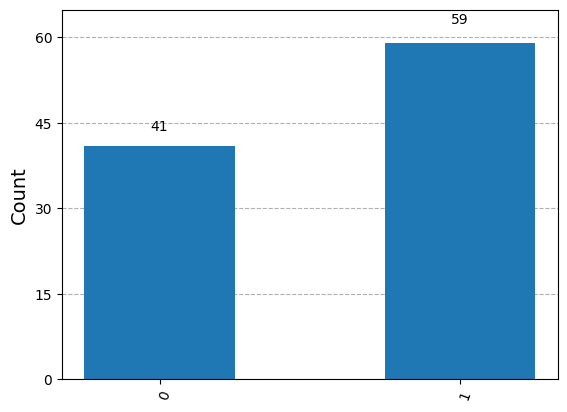

{'0': 51, '1': 49}


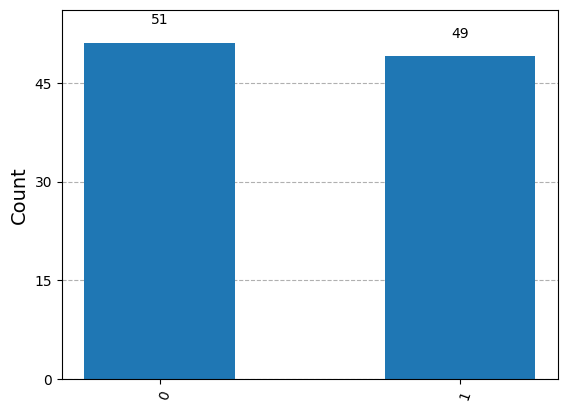

{'0': 61, '1': 39}


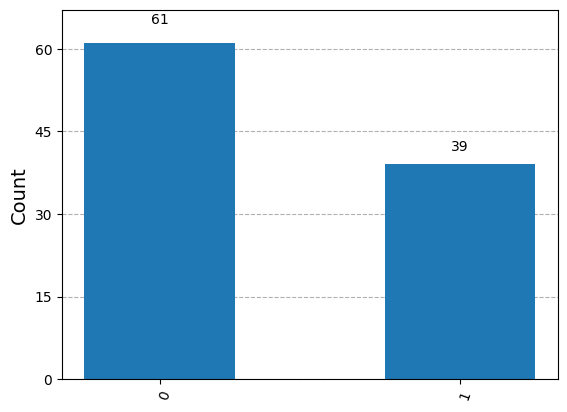

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize

def bell_phi_plus(circ, q1, q2):
    """
    Create a Bell state (|Φ+⟩) between two qubits.

    This function applies a Hadamard gate to the first qubit (q1) and then a CNOT gate
    with the first qubit as control and the second qubit (q2) as target. This creates
    an entangled Bell state (|Φ+⟩) between the two qubits.

    Parameters:
    circ (QuantumCircuit): The quantum circuit to which the gates will be added.
    q1 (int): The index of the first qubit.
    q2 (int): The index of the second qubit.

    Returns:
    None
    """
    circ.h(q1)
    circ.cx(q1, q2)
    circ.barrier()

# Creamos el registro quantico con 3 qubits
qreg = QuantumRegister(3, name='q')

# Creamos el registro clasico con 3 bits
cz = ClassicalRegister(1, name='cx')
cx = ClassicalRegister(1, name='cz')
c0 = ClassicalRegister(1, name='c0')

# Creamos el circuito cuantico
circ = QuantumCircuit(qreg, cz, cx, c0, name='quantum teleportation')

# Inicializamos el qubit de Alice a un estado arbitrario psi y mostramos su valor.
psi = random_statevector(2)
display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
init_gate = Initialize(psi)
init_gate.label = "init"
init_gate_inverse = init_gate.gates_to_uncompute()
init_gate_inverse.label = "init†"

circ.append(init_gate, [2])
circ.barrier()

# Creamos un par EPR entre R y S
bell_phi_plus(circ, 1, 2)

# Aplicamos una medicion de Bell entre S y el qubit a teleportar
circ.cx(0, 1)
circ.h(0)
circ.barrier()

# Medimos los qubits 0 y 1 
circ.measure(0, 0)
circ.measure(1, 1)

# Aplicamos la correccion que tiene que hacer Bob
circ.x(2).c_if(cz, 1)
circ.z(2).c_if(cx, 1)
circ.barrier()

# Hacemos la inversa de la inicializacion
circ.append(init_gate_inverse, [0])
measure = circ.measure(0, 2)
# Mostrar el circuito
display(circ.draw(output='latex', reverse_bits=True))

# Ejecutamos en un backend real
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

print("Backends disponibles:", service.backends())

backend = service.least_busy(simulator=False, operational=True)
#backend = service.backend('ibm_brisbane')

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ)

isa_circuit.draw("mpl", idle_wires=False)

# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))

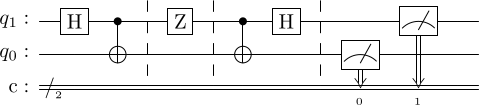

Backends disponibles: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]
job id: czbhr3rb7tt0008gc5yg
PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=100, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-03-16 18:44:34', stop='2025-03-16 18:44:35', size=100>)])}, 'version': 2})
{'01': 1, '10': 97, '11': 1, '00': 1}


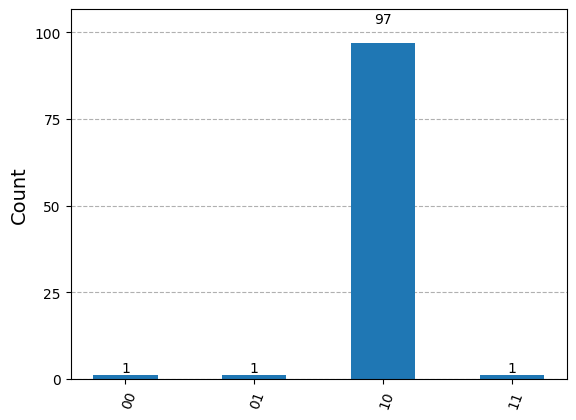

In [35]:
from qiskit import QuantumCircuit, QuantumRegister, transpile, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

def bell_phi_plus(circ, q1, q2):
    circ.h(q1)
    circ.cx(q1, q2)
    circ.barrier()

# Creamos el registro quantico con 3 qubits
qreg = QuantumRegister(2, name='q')

# Creamos el registro clasico con 3 bits
creg = ClassicalRegister(2, name='c')

# Creamos el circuito cuantico
circ = QuantumCircuit(qreg, creg, name='superdense coding')

# Creamos un par EPR entre R y S
circ.h(1)
circ.cx(1, 0)
circ.barrier()

## Aplicamos la codificacion que queremos enviar 10 en este caso
a = 1
b = 0

if a == 1:
    circ.z(1)
if b == 1:
    circ.x(1)
circ.barrier()

# Aplicamos una medicion de Bell entre S y el qubit a teleportar
circ.cx(1, 0)
circ.h(1)
circ.barrier()

# Medimos
circ.measure(0, 0)
circ.measure(1, 1)

# Mostrar el circuito
display(circ.draw(output='latex', reverse_bits=True))

# Ejecutamos en un backend real
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

print("Backends disponibles:", service.backends())

backend = service.least_busy(simulator=False, operational=True)
#backend = service.backend('ibm_brisbane')

# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(circ)

isa_circuit.draw("mpl", idle_wires=False)

# Ejecutamos el circuito
sampler = Sampler(backend)
job = sampler.run([isa_circuit], shots=100)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

# Mostramos resultados
for item in result._pub_results[0].data.items():
    print(item[1].get_counts())
    display(plot_histogram(item[1].get_counts()))